# Lab 2- Numpy

Read through the following notebook to get an introduction to numpy: [Numpy Intro](jrjohansson-lectures/Lecture-2-Numpy.ipynb)

## Exercise 2.1

Let start with some basic reshape manipulations. Consider a classification task. We can imagine the training data X consisting of N examples each with M inputs, so the shape of X is (M,N). We usually express the output of the Neural Network, which for the training sample encodes the true class of each of the M examples in X, in a "one-hot" matrix of shape (N,C), where C is the number of classes and each row corresponds to the true class for the corresponding example in X. So for a given row Y[i], all elements are 0 except for the column corresponding to the true class.

For example consider a classification task of separating between 4 classes. We'll call them A, B, C, and D.


In [1]:
import numpy as np

Y=np.array( [ [0, 1, 0, 0], # Class B
              [1, 0, 0, 0], # Class A
              [0, 0, 1, 0], # Class C
              [0, 0, 0, 1]  # Class D
            ])

print "Shape of Y:", Y.shape

Shape of Y: (4, 4)


Lets imagine that we want to change to a 2 classes instead by combining classes A with B and C with D. Use np.reshape and np.sum to create a new vector Y1. Hint: change the shape of Y into (8,2), sum along the correct axes, and change shape to (4,2).

In [3]:
Y1= Y.reshape(8,2)
Y1= np.sum(Y1, axis=1)
print Y1.reshape(4, 2)

[[1 0]
 [1 0]
 [0 1]
 [0 1]]


## Exercise 2.2

Oftentimes we find that neutral networks work best when their input is mostly between 0,1. Below, we create a random dataset that is normal distributed (mean of 4, sigma of 10). Shift the data so that the mean is 0.5 and 68% of the data lies between 0 and 1.

In [4]:
X=np.random.normal(4,10,500)
print np.mean(X)
print np.min(X)
print np.max(X)

3.51886139966
-27.1431617459
37.708009427


0.475943069983
-1.0571580873
2.18540047135


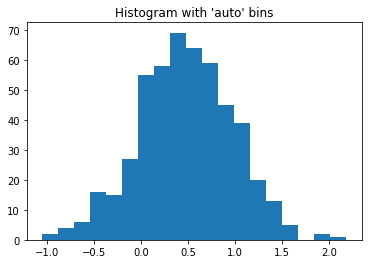

In [7]:
X1=(X-4)/20.+0.5
print np.mean(X1)
print np.min(X1)
print np.max(X1)

import matplotlib.pyplot as plt
plt.hist(X1, bins='auto')  X
plt.title("Grap with 'auto' bins")
plt.show()

## Exercise 2.3

Using np.random.random and np.random.normal to generate two datasets. Then use np.where to repeat exercise 1.4 showing that one creates a flat distribution and the other does not. 

In [1]:
import numpy as np


def findper(n,x,y,N):
    i= (np.where(n<y))
    p = (np.where(n<x))
    return abs((np.size(i)-np.size(p)) *100/N) 

normal = np.random.normal(0.5,0.125,1000)
flat = np.random.random(1000)

 
def printfun():
    for i in range(10):
        n=[0.1*x for x in range(10)]
        p=[0.1*x -0.1 for x in range(10)]
        print"normal distribution between {} and {} is {}%".format(n[i],p[i],findper(normal,p[i],n[i],1000))
    print('-This shows that the distribution is indeed normal -')  
    for i in range(10):
        n=[0.1*x for x in range(10)]
        p=[0.1*x -0.1 for x in range(10)]
        print"random distribution between {} and {} is {}%".format(n[i],p[i],findper(flat,p[i],n[i],1000))    
    print('- this shows that the distribution is random - ')

printfun()

normal distribution between 0.0 and -0.1 is 0%
normal distribution between 0.1 and 0.0 is 0%
normal distribution between 0.2 and 0.1 is 0%
normal distribution between 0.3 and 0.2 is 5%
normal distribution between 0.4 and 0.3 is 15%
normal distribution between 0.5 and 0.4 is 28%
normal distribution between 0.6 and 0.5 is 26%
normal distribution between 0.7 and 0.6 is 16%
normal distribution between 0.8 and 0.7 is 5%
normal distribution between 0.9 and 0.8 is 1%
-This shows that the distribution is indeed normal -
random distribution between 0.0 and -0.1 is 0%
random distribution between 0.1 and 0.0 is 9%
random distribution between 0.2 and 0.1 is 9%
random distribution between 0.3 and 0.2 is 9%
random distribution between 0.4 and 0.3 is 7%
random distribution between 0.5 and 0.4 is 9%
random distribution between 0.6 and 0.5 is 10%
random distribution between 0.7 and 0.6 is 10%
random distribution between 0.8 and 0.7 is 11%
random distribution between 0.9 and 0.8 is 10%
- this shows that

## Exercise 2.4

Now lets play with some real data. We will load a file of example Neutrino interactions in LArTPC detector. There are 2 read out planes in the detector with 240 wires each, sampled 4096 times. Shift the images in the same way as exercise 2.2.

In [2]:
import h5py
f=h5py.File("/data/LArIAT/h5_files/nue_CC_3-1469384613.h5","r")
print f.keys()
images=f["features"]
print images.shape


[u'Eng', u'Track_length', u'enu_truth', u'features', u'lep_mom_truth', u'mode_truth', u'pdg']
(2500, 2, 240, 4096)


In [3]:
print images[0]

[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0. -1. -1. ...,  0.  0.  0.]
  ..., 
  [ 0.  1.  1. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [-1. -1.  0. ..., -1. -1. -1.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [-1. -1. -1. ..., -1. -1. -1.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]]


In [4]:
for i,v in enumerate(X):
    X1.append ((v-np.mean(X)+0.5)/np.std(X)) 

np.array(X1)

print images[0]

NameError: name 'X' is not defined